In [30]:
# Finished by Zhihao Liu
# In this code, I simulated the three body motion for coloumb explosion experiment in 2D surface
# We only consider the coulomb force in this model ( ignore the quantum effect)
# New changes: the charge for each atom is not fixed. The charge is the function of bond length 
# The function mentioned above is different in different molecules.
# We need to input the mass, initial position, initial velocity of each atom and the stepsize in simulation
# This programme will output the final position, final momentum, final kinetic energy of each ion and the trajectary.

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import math

# Define the coulomb constant
k = 8.987155e9  # N * m^2 * C^-2


# Time parameters
dt = 0.01 * 1e-15  # Time step (in fs) 1 fs = 1*10^-15s
num_steps = 1000000

# Initial conditions for three bodies (mass , charge , position, velocity)
# initial mass
m1 = 32.0 * 1.67377e-27 # Mass of atom 1 (in kg) 1 atom weight = 1.67377 * 10^-27 kg
m2 = 16.0 * 1.67377e-27 # Mass of atom 2 (in kg) 1 atom weight = 1.67377 * 10^-27 kg
m3 = 16.0 * 1.67377e-27 # Mass of atom 3 (in kg) 1 atom weight = 1.67377 * 10^-27 kg

# each atom's initial charge

# each atom's final charge
Q1_f = 2 * 1.602e-19 # charge of atom 1 (in Elementary charge) 1 elementary charge = 1.602 * 10^-19 coulombs
Q2_f = 1 * 1.602e-19 # charge of atom 2  (in Elementary charge) 1 elementary charge = 1.602 * 10^-19 coulombs
Q3_f = 1 * 1.602e-19 # charge of atom 3  (in Elementary charge) 1 elementary charge = 1.602 * 10^-19 coulombs


# Initial positions (x, y) and velocities (vx, vy) for each body
r1 = np.array([0.0,  0.370873]) * 1e-10 # atom 1 position (in Am) 1 Am = 1 * 10^-10m
v1 = np.array([0.0, 0.0])  # atom 1 velocity

r2 = np.array([1.261748, -0.370873]) * 1e-10 # atom 2 position (in Am) 1 Am = 1 * 10^-10m
v2 = np.array([0.0, 0.0])  # atom 2 velocity

r3 = np.array([-1.261748, -0.370873]) * 1e-10 # atom 3 position (in Am) 1 Am = 1 * 10^-10m
v3 = np.array([0.0, 0.0])  # atom 3 velocity

# Initialize arrays to store positions and velocities
positions = np.zeros((num_steps, 3, 2))
velocities = np.zeros((num_steps, 3, 2))

In [10]:
# Re is the value which means after 3*1e-10m there is no overlap between each atom's orital. 
# In SO2 calculation, we keep it at 3
# Define constants
import math
Re = 1.46*1e-10 #unit is m
Rc = 3.0*1e-10
time_depend_charge = True

def charge_over_time(ini_charge, final_charge, bond_length):
    """
    Calculate the charge over time.

    Parameters:
    ini_charge (float): Initial charge
    final_charge (float): Final charge
    bond_length (float): Bond length

    Returns:
    float: Calculated charge over time
    """
    if time_depend_charge:
        Q_t = final_charge * (1 - (1 - ini_charge / final_charge) * math.exp((Re - bond_length) / Rc))
    else:
        Q_t = final_charge
                              
    return Q_t

# Example usage
a = charge_over_time(0.771* 1.602e-19, 1* 1.602e-19, 9.8*1e-10)
print(a)

1.579240677260557e-19


In [11]:
# Numerical integration
for i in range(num_steps):
    Q2_t = charge_over_time(0.77* 1.602e-19, Q2_f, np.linalg.norm(r2 - r1))
    Q3_t = charge_over_time(0.77* 1.602e-19, Q3_f, np.linalg.norm(r3 - r1))
    Q1_t = 4 * 1.602e-19 - Q2_t - Q3_t 
    
    
    
    
    
    # Compute accelerations
    a1 = k / m1 * (Q1_t * Q2_t * (r1 - r2)/ np.linalg.norm(r1 - r2)** 3 + Q1_t * Q3_t * (r1 - r3) / np.linalg.norm(r1 - r3) ** 3)
    a2 = k / m2 * (Q2_t * Q1_t * (r2 - r1)/ np.linalg.norm(r2 - r1)** 3 + Q2_t * Q3_t * (r2 - r3) / np.linalg.norm(r2 - r3) ** 3)
    a3 = k / m3 * (Q1_t * Q3_t * (r3 - r1)/ np.linalg.norm(r3 - r1)** 3 + Q2_t * Q3_t * (r3 - r2) / np.linalg.norm(r3 - r2) ** 3)


    np.seterr(invalid='ignore')

    # Update positions and velocities
    r1 = r1 + v1 * dt
    v1 = v1 + a1 * dt

    #print(r1)

    r2 = r2 + v2 * dt
    v2 = v2 + a2 * dt

    r3 = r3 + v3 * dt
    v3 = v3 + a3 * dt

    # Store positions and velocities
    positions[i] = np.array([r1, r2, r3])
    velocities[i] = np.array([v1, v2, v3])

S kenetic energy is 16.760495719848624 eV
O1 kenetic energy is 6.634639747149869 eV
O2 kenetic energy is 6.634639747149869 eV
total KER is 30.029775214148362 eV
S momentum is 5.3631435851357e-22 kgm/s
O1 momentum is 2.385995772310836e-22 kgm/s
O2 momentum is 2.385995772310836e-22 kgm/s
S momentum is 269.1192806852347 a.u.
O1 momentum is 119.72781555615505 a.u.
O2 momentum is 119.72781555615505 a.u.
[    0.         10013.21788749]
[ 7369.75355902 -5006.60894375]
[-7369.75355902 -5006.60894375]


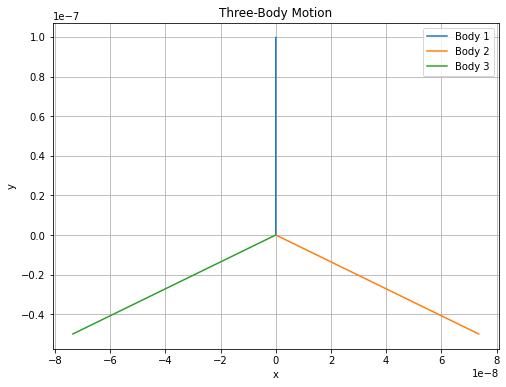

In [8]:
#calculate and print the KE of each ion
KE1 = 0.5 * m1 * np.linalg.norm(v1)**2 * 6.242e18 #calculate the final kenetic energy of each ion. Unit is eV
KE2 = 0.5 * m2 * np.linalg.norm(v2)**2 * 6.242e18
KE3 = 0.5 * m3 * np.linalg.norm(v3)**2 * 6.242e18
print('S kenetic energy is' + ' '+ str(KE1) + ' eV')
print('O1 kenetic energy is' + ' '+ str(KE2) + ' eV')
print('O2 kenetic energy is' + ' '+ str(KE3) + ' eV')
print('total KER is ' + str(KE1+KE2+KE3) + ' eV')



#Calculate the momentum of each ion, unit is kgm/s
P1 = m1 * np.linalg.norm(v1)
P2 = m2 * np.linalg.norm(v2)
P3 = m3 * np.linalg.norm(v3)
print('S momentum is' + ' '+ str(P1) + ' kgm/s')
print('O1 momentum is' + ' '+ str(P2) + ' kgm/s')
print('O2 momentum is' + ' '+ str(P3) + ' kgm/s')

#calculate the momentun of each in a.u.
P1_au = P1/(1.99285e-24)
P2_au = P2/(1.99285e-24)
P3_au = P3/(1.99285e-24)
print('S momentum is' + ' '+ str(P1_au) + ' a.u.')
print('O1 momentum is' + ' '+ str(P2_au) + ' a.u.')
print('O2 momentum is' + ' '+ str(P3_au) + ' a.u.')

#Output each fragment's final angle between movement direction and x axis


print(v1)
print(v2)
print(v3)

# Plot the trajectories
plt.figure(figsize=(8, 6))
for i in range(3):
    plt.plot(positions[:, i, 0], positions[:, i, 1], label=f"Body {i+1}")

plt.xlabel("x")
plt.ylabel("y")
plt.title("Three-Body Motion")
plt.legend()
plt.grid(True)
